In [89]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import itertools


In [90]:
# Q1(a)

# define the matrix

A = np.array([[4, -3],[-3 ,7]])

b = np.array([[-1],[8]]) # make sure to use double brackets, it is 2x1 not 1x2

c = np.array([[2]])



/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/858141625.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(0.5*x.T*A*x - b.T*x + c)
/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/858141625.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


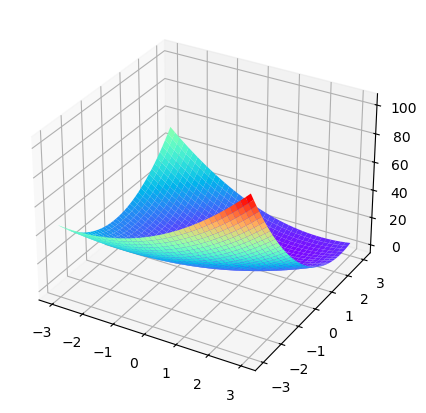

In [91]:
# function to plot the paraboloid, for the given matrix A, b, c and use for gradient descent laster

def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.add_subplot(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

x1,x2,zs = paraboloid(A,b,c)

/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/2042364437.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


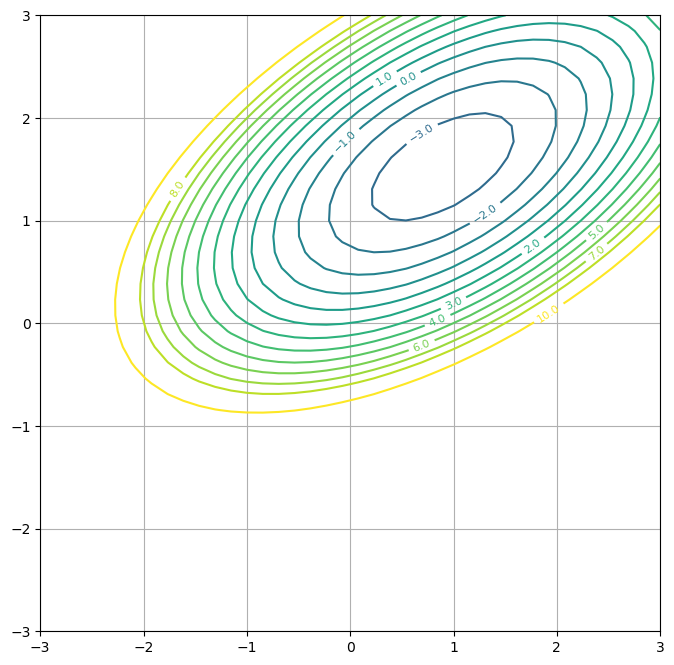

In [92]:
# make a contour plot to visualize the paraboloid to make sure correct

def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8)) 
    levels = [-9.9,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,10] # you can adjust the levels
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

contoursteps(x1,x2,zs)

Local mininum occurs at: [[0.8916078 ]
 [1.52438194]]
Number of iterations: 279


/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/2042364437.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


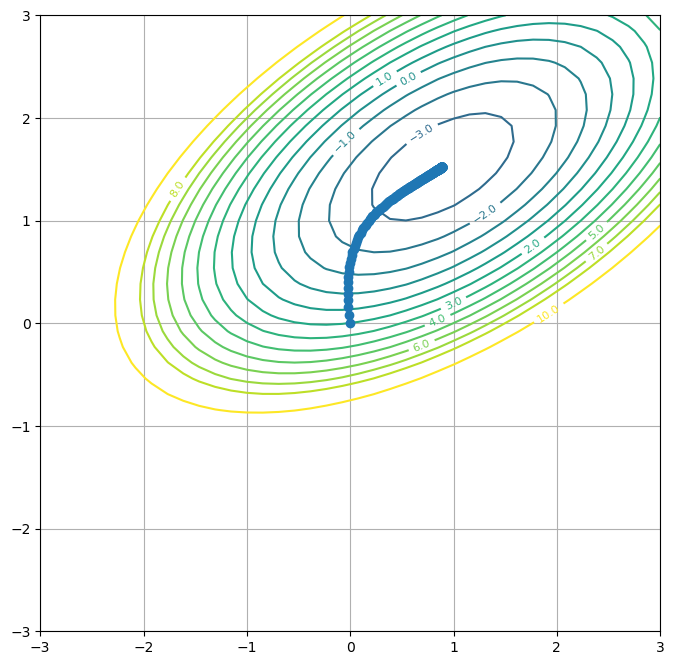

In [93]:
# gradient descent

# x = np.matrix([[-1.],[2.]])
# steps = [(-1.,2.)]
x = np.matrix([[0.],[0.]])
steps = [(0.,0.)]
i = 0
imax = 1000
eps = 0.001
alpha = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
gradient_r_array = [] # to store the residuals for later analysis 
while i< imax and delta > eps**2 * delta0:
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    flat_r = np.array(r).flatten()
    gradient_r_array.append(flat_r)
    # gradient_r_array.append(r)
    delta = r.T * r
    i +=1



contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/599992284.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(delta/float(r.T * (A * r)))


[array([2.64, 0.33]), array([-0.25325581,  2.02604651]), array([0.66859535, 0.08357442]), array([-0.06413851,  0.51310806]), array([0.16932566, 0.02116571]), array([-0.01624345,  0.1299476 ]), array([0.04288271, 0.00536034]), array([-0.00411375,  0.03290998]), array([0.0108603 , 0.00135754]), array([-0.00104183,  0.00833465]), array([0.00275043, 0.0003438 ])]
Local mininum occurs at: [[0.89366924]
 [1.52580913]]
Number of iterations: 11


/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/2042364437.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


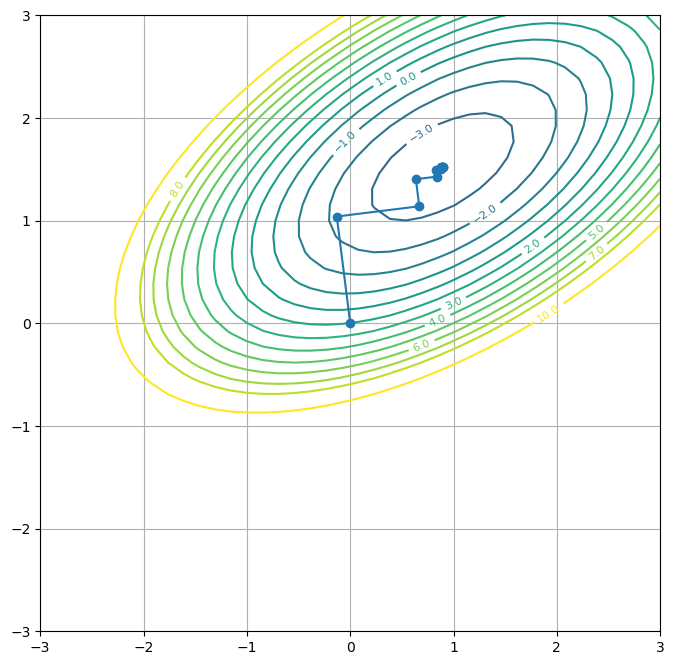

In [94]:
#steepest descent

# x = np.matrix([[-1.],[2.]])
# steps = [(-1.,2.)]
x = np.matrix([[0.],[0.]])
steps = [(0.,0.)]
i = 0
imax = 1000
eps = 0.001
r = b - A * x
delta = r.T * r
delta0 = delta
steepest_r_array = [] # to store the residuals for later analysis
while i< imax and delta > eps**2 * delta0:
    alpha = float(delta/float(r.T * (A * r)))
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x

    # Convert r to a 1D NumPy array for better handling later 
    # steepest_r_array.append(r)
    flat_r = np.array(r).flatten()
    steepest_r_array.append(flat_r)

    delta = r.T * r
    i +=1


# debug print
print(steepest_r_array)


contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/3924497112.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(deltanew / float(p.T * (A * p)))
/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/3924497112.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta = float(deltanew / float(deltaold))


Local mininum occurs at: [[0.89473684]
 [1.52631579]]
Number of iterations: 2


/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/2042364437.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


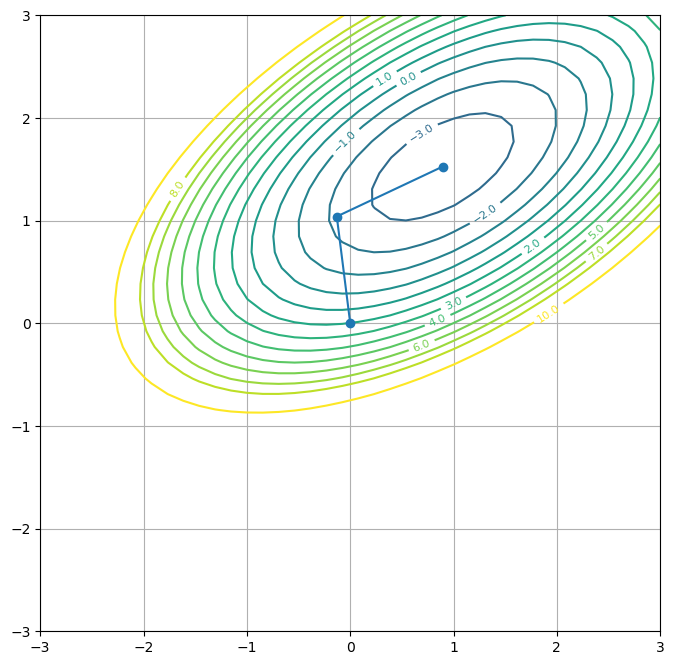

In [95]:
# conjugate gradient

# x = np.matrix([[-1.],[-1.]])
# steps = [(-1.,-1.)] # steps is a list and the tuple (-1,-1) is the initial position
x = np.matrix([[0.],[0.]])
steps = [(0.,0.)]
i = 0
imax = 3
eps = 0.001
r = b - A * x
p = r
deltanew = r.T * r
delta0 = deltanew
conjugate_r_array = [] # to store the residuals for later analysis
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(p.T * (A * p)))
    x = x + alpha * p
    steps.append((x[0,0],x[1,0]))
    r = r - alpha * (A * p)
    flat_r = np.array(r).flatten()
    conjugate_r_array.append(flat_r)
    # conjugate_r_array.append(r)
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1

    
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

In [96]:
# Q1(b)

tolerance = 1e-6  # adjust the tolerance as needed

for j in range(len(steepest_r_array) - 1):
    dot_product = np.dot(steepest_r_array[j], steepest_r_array[j + 1])
    if abs(dot_product) < tolerance:
        print(f"Residuals at iterations {j} and {j + 1} are orthogonal (dot product: {dot_product:.2e}).")
    else:
        print(f"Residuals at iterations {j} and {j + 1} are not orthogonal (dot product: {dot_product:.2e}).")

# # as the values are almost zero, the residuals are orthogonal to each other

Residuals at iterations 0 and 1 are orthogonal (dot product: -1.10e-15).
Residuals at iterations 1 and 2 are orthogonal (dot product: -6.47e-16).
Residuals at iterations 2 and 3 are orthogonal (dot product: 2.14e-16).
Residuals at iterations 3 and 4 are orthogonal (dot product: 2.89e-16).
Residuals at iterations 4 and 5 are orthogonal (dot product: 3.53e-17).
Residuals at iterations 5 and 6 are orthogonal (dot product: 1.68e-16).
Residuals at iterations 6 and 7 are orthogonal (dot product: -3.77e-18).
Residuals at iterations 7 and 8 are orthogonal (dot product: 2.36e-17).
Residuals at iterations 8 and 9 are orthogonal (dot product: 1.79e-18).
Residuals at iterations 9 and 10 are orthogonal (dot product: 1.64e-18).


Initial residual norm: 8.06225774829855
[8.06225774829855, 7.444897581565511, 6.885684083662277, 6.379423988678366, 5.9213561124966265, 5.507111405660139, 5.132677183902558, 4.794365316042838, 4.488784139487337, 4.212813847678752, 3.9635850553588376, 3.738460202942156, 3.5350174190036343, 3.351036428804311, 3.184486084708182, 3.0335131062518754, 2.896431654540466, 2.771713424381564, 2.6579780114833595, 2.553983392468066, 2.458616433494064, 2.3708834114121173, 2.289900584515905, 2.214884885819183, 2.1451448307207346, 2.080071735157787, 2.0191313332714205, 1.961855868936667, 1.9078367167285992, 1.8567175678837051, 1.808188197695776, 1.7619788139281993, 1.717854971951987, 1.67561303165272, 1.635076123564314, 1.5960905868464903, 1.558522839185051, 1.522256637991506, 1.487190692965386, 1.453236591763676, 1.4203170028652174, 1.388364122456759, 1.3573183350956683, 1.3271270608692936, 1.2977437646643686, 1.2691271059089584, 1.2412402097094295, 1.2140500426515999, 1.1875268786597377, 1.16164384

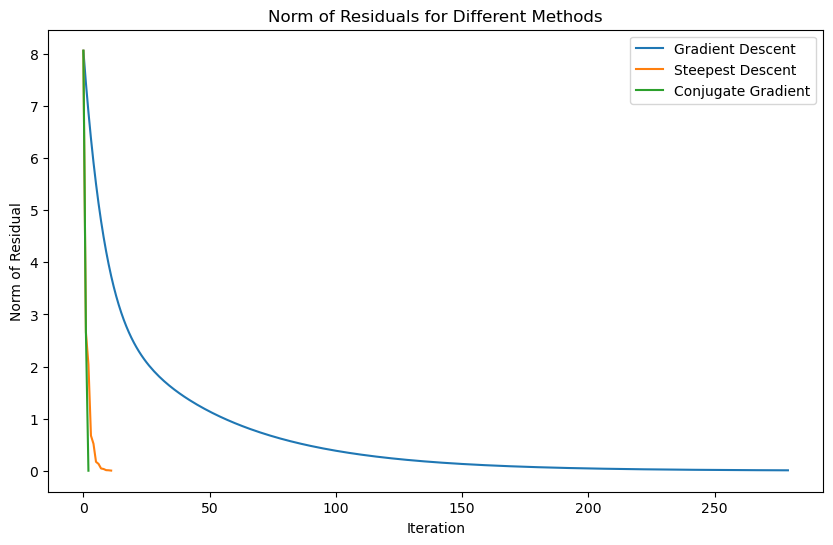

In [97]:
# Q1(c)

# print(gradient_r_array) array of residuals for gradient descent for debugging
# print(steepest_r_array)
# print(conjugate_r_array)

initial_norm_r_value = np.sqrt(1**2 + 8**2) # initial residual norm when x = [0, 0] b = [-1, 8] and A = [[4, -3], [-3, 7]] for r = b - Ax
print(f"Initial residual norm: {initial_norm_r_value}")

Gradient_norm_r = [initial_norm_r_value]
Steepest_norm_r = [initial_norm_r_value]
Conjugate_norm_r = [initial_norm_r_value]

for i in range(len(gradient_r_array)):
    Gradient_norm_r.append(np.linalg.norm(gradient_r_array[i]))

for i in range(len(steepest_r_array)):
    Steepest_norm_r.append(np.linalg.norm(steepest_r_array[i]))

for i in range(len(conjugate_r_array)):
    Conjugate_norm_r.append(np.linalg.norm(conjugate_r_array[i]))

print(Gradient_norm_r)
print(Steepest_norm_r)
print(Conjugate_norm_r)

plt.figure(figsize=(10, 6))
plt.plot(Gradient_norm_r, label='Gradient Descent')
plt.plot(Steepest_norm_r, label='Steepest Descent')
plt.plot(Conjugate_norm_r, label='Conjugate Gradient')
plt.xlabel('Iteration')
plt.ylabel('Norm of Residual')
plt.title('Norm of Residuals for Different Methods')
plt.legend()
plt.show()

# we can see that the conjugate gradient method converges faster than the other two methods


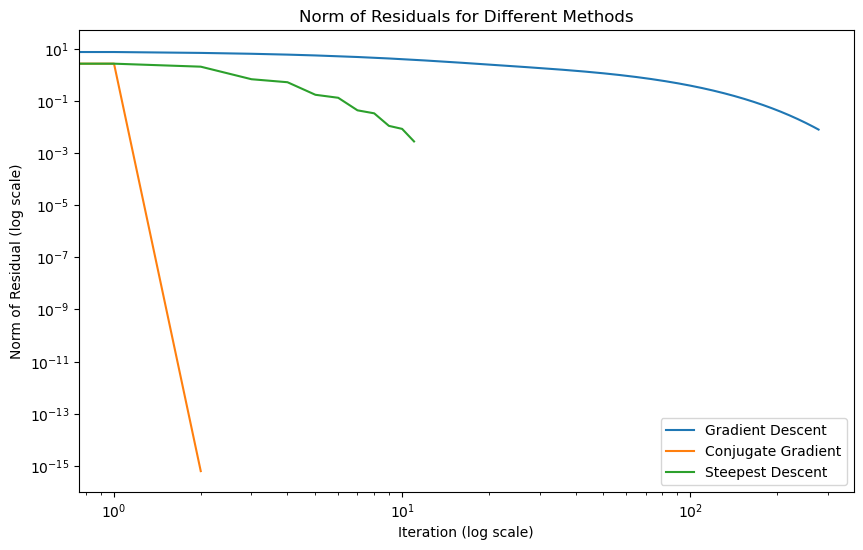

In [98]:
# plot the residuals for each method with y axis in log scale also scale the x axis and y axis to see the residuals better
plt.figure(figsize=(10, 6))
plt.plot(Gradient_norm_r, label='Gradient Descent')
plt.plot(Conjugate_norm_r, label='Conjugate Gradient')
plt.plot(Steepest_norm_r, label='Steepest Descent')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # y-axis is already log scaled from your original code
plt.xlabel('Iteration (log scale)')
plt.ylabel('Norm of Residual (log scale)')
plt.title('Norm of Residuals for Different Methods')
plt.legend()
plt.show()

#we can see that the residuals are decreasing exponentially for all methods even in log scale


#Q2 (a)

we have to solve the following system of equations:
$$
x - z = 0 \\
3y = 6 \\
-x + 4z =3
$$

The augmented matrix is:
$$
\begin{bmatrix}
1 & 0 & -1 & | & 0 \\
0 & 3 & 0 & | & 6 \\
-1 & 0 & 4 & | & 3
\end{bmatrix}
$$

$$
\R_3 \leftarrow \R_3 + \R_1
$$

$$
\begin{bmatrix}
1 & 0 & -1 & | & 0 \\
0 & 3 & 0 & | & 6 \\
0 & 0 & 3 & | & 3
\end{bmatrix}
$$

$$
\R_2 \leftarrow \R_2/3 \\
\R_3 \leftarrow \R_3/3
$$

$$
\begin{bmatrix}
1 & 0 & -1 & | & 0 \\   
0 & 1 & 0 & | & 2 \\
0 & 0 & 1 & | & 1
\end{bmatrix}
$$

$$
\R_1 \leftarrow \R_1 + \R_3
$$

$$
\begin{bmatrix}
1 & 0 & 0 & | & 1 \\
0 & 1 & 0 & | & 2 \\
0 & 0 & 1 & | & 1
\end{bmatrix}

$$

Therefore, the solution is:

$$
x = 1, y = 2, z = 1
$$





In [99]:
#Q2(b)

# define the matrix

A = np.array([[1,0, -1],[0, 3 ,0], [-1, 0 ,4]])

# A is the matrix of 
# 1 0 -1
# 0 3 0
# -1 0 4

b = np.array([[0],[6],[3]]) 

c = np.array([[0]])

In [100]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)

In [101]:
# Q2 (b)
import numpy as np

# ======== Define the quadratic function parameters ========
A = np.array([[1, 0, -1],
              [0, 3,  0],
              [-1, 0, 4]])
b = np.array([[0],[6],[3]]) 
c = np.array([[0, 0, 0]])

def f(x, A, b, c):
    return float(0.5 * x.T @ A @ x - b.T @ x + c)

# ======== Gradient Descent ========
# x = np.matrix([[-1.],[2.],[1.]])
# steps_grad = [(-1., 2., 1.)]
x = np.matrix([[0.], [0.], [0.]])
steps_grad = [(0., 0., 0.)]
i = 0
imax = 1000
eps = 0.001
alpha = 0.01
r = b - A @ x
delta = r.T @ r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alpha * r
    steps_grad.append((x[0,0], x[1,0], x[2,0]))
    r = b - A @ x
    delta = r.T @ r
    i += 1

print("Gradient Descent minimum:")
print(f"[{x[0,0]:.3f}\n {x[1,0]:.3f}\n {x[2,0]:.3f}]")
print("Gradient Descent: Number of iterations: " + str(i))
# Now, steps_grad holds the iteration path.

# ======== Steepest Descent ========
# x = np.matrix([[-1.],[2.],[1.]])
# steps_steepest = [(-1., 2., 1.)]
x = np.matrix([[0.], [0.], [0.]])
steps_steepest = [(0., 0., 0.)]
i = 0
r = b - A @ x
delta = r.T @ r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / float(r.T @ (A @ r)))
    x = x + alpha * r
    steps_steepest.append((x[0,0], x[1,0], x[2,0]))
    r = b - A @ x
    delta = r.T @ r
    i += 1

print("Steepest Descent minimum:")
print(f"[{x[0,0]:.3f}\n {x[1,0]:.3f}\n {x[2,0]:.3f}]")
print("Steepest Descent: Number of iterations: " + str(i))
# steps_steepest now holds the iteration path.

# ======== Conjugate Gradient ========
# x = np.matrix([[-1.],[2.],[1.]])
# steps_conjugate = [(-1., 2., 1.)]
x = np.matrix([[0.], [0.], [0.]])
steps_conjugate = [(0., 0., 0.)]
i = 0
imax = 3      # per your code, for conjugate gradient (could be larger)
eps = 0.01
r = b - A @ x
p = r
deltanew = r.T @ r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(p.T @ (A @ p)))
    x = x + alpha * p
    steps_conjugate.append((x[0,0], x[1,0], x[2,0]))
    r = r - alpha * (A @ p)
    deltaold = deltanew
    deltanew = r.T @ r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1

print("Conjugate Gradient minimum:")
print(f"[{x[0,0]:.3f}\n {x[1,0]:.3f}\n {x[2,0]:.3f}]")
print("Conjugate Gradient: Number of iterations: " + str(i))
# steps_conjugate holds the iteration path.

# For example, to CSV:
import csv
with open('iterates_gradient.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["x1", "x2", "x3"])
    writer.writerows(steps_grad)

with open('iterates_steepest.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["x1", "x2", "x3"])
    writer.writerows(steps_steepest)

with open('iterates_conjugate.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["x1", "x2", "x3"])
    writer.writerows(steps_conjugate)


# the minimum values are very close to the actual minimum values of x = [1,2,1] hence the methods are working correctly
# the conjugate gradient method converges much faster than the other two methods, also with less error.

Gradient Descent minimum:
[0.991
 2.000
 0.997]
Gradient Descent: Number of iterations: 696
Steepest Descent minimum:
[0.995
 2.000
 0.998]
Steepest Descent: Number of iterations: 16
Conjugate Gradient minimum:
[1.000
 2.000
 1.000]
Conjugate Gradient: Number of iterations: 3


/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/617230182.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(delta / float(r.T @ (A @ r)))
/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/617230182.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha = float(deltanew / float(p.T @ (A @ p)))
/var/folders/5q/j__vq1qx35s6jfnw38fm1thw0000gn/T/ipykernel_40562/617230182.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.2

#here is the matlab code for the 3D plot
#note that the path of the image is your local path

clear; close all; clc;

%% Define the quadratic function parameters
% Function: f(x) = 0.5 * x' * A * x - b' * x + c
A = [1, 0, -1;
     0, 3,  0;
    -1, 0,  4];
b = [0; 6; 3];
c = 0;

% Compute the minimizer x* for reference:
xmin = [1; 2; 1];
fmin = 0.5 * (xmin') * A * xmin - (b') * xmin + c;

%% Create a 3-D grid covering the region of interest
x1 = linspace(-4, 4, 50);
x2 = linspace(-4, 4, 50);
x3 = linspace(-4, 4, 50);
[X1, X2, X3] = meshgrid(x1, x2, x3);

F = 0.5*(A(1,1)*X1.^2 + 2*A(1,2)*X1.*X2 + 2*A(1,3)*X1.*X3 + ...
         A(2,2)*X2.^2 + 2*A(2,3)*X2.*X3 + A(3,3)*X3.^2) -...
    (b(1)*X1 + b(2)*X2 + b(3)*X3) + c;

% Define isosurface levels based on the minimum value
isoLevels = [fmin + 1, fmin + 2, fmin + 3];

%% Read iteration paths from CSV files
iterPathGradient = readmatrix('/Users/charleswong/Desktop/iterates_gradient.csv'); % Excluding header if necessary
iterPathSteepest = readmatrix('/Users/charleswong/Desktop/iterates_steepest.csv');
iterPathConjugate = readmatrix('/Users/charleswong/Desktop/iterates_conjugate.csv');

%% Define the iteration path information for each method
algorithms   = {'Gradient Descent', 'Steepest Descent', 'Conjugate Gradient'};
plotSymbols  = {'-o', '-s', '-^'};
iterationPaths = {iterPathGradient, iterPathSteepest, iterPathConjugate};

%% Loop over each method to create a separate figure
for i = 1:length(algorithms)
    figure;
    hold on;
    
    % Plot the isosurfaces for the quadratic function
    for k = 1:length(isoLevels)
        p = patch(isosurface(X1, X2, X3, F, isoLevels(k)));
        isonormals(X1, X2, X3, F, p);
        p.FaceColor = [0.2, 0.8, 0.4];
        p.EdgeColor = 'none';
        p.FaceAlpha = 0.2;
    end
    
    % Add the iteration path for the respective method
    plot3(iterationPaths{i}(:,1), iterationPaths{i}(:,2), iterationPaths{i}(:,3), ...
          plotSymbols{i}, 'LineWidth', 2, 'MarkerSize', 8, 'DisplayName', algorithms{i});
      
    % Mark the minimizer computed from quadratic optimization
    plot3(xmin(1), xmin(2), xmin(3), 'kp', 'MarkerSize', 15, 'MarkerFaceColor', 'k', ...
          'DisplayName', 'Minimizer');
    
    % Enhance visual appearance
    axis equal;         % Equal scaling in all directions
    view(3);            % 3-D view
    camlight;           % Adds a light for better shading
    lighting gouraud;   % Improves the appearance of the surfaces
    xlabel('x_1');
    ylabel('x_2');
    zlabel('x_3');
    title(sprintf('3-D Isosurfaces with %s Iteration Path', algorithms{i}));
    grid on;
    legend('show', 'Location', 'best');
    
    hold off;
end

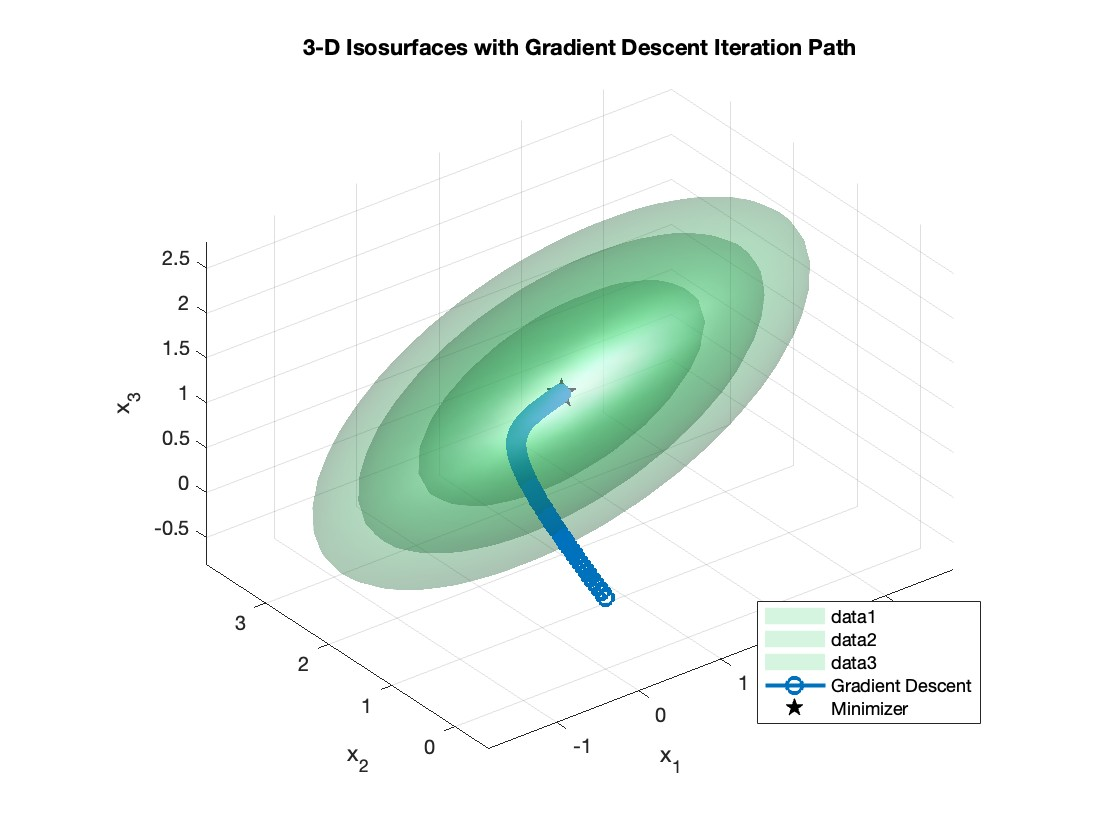

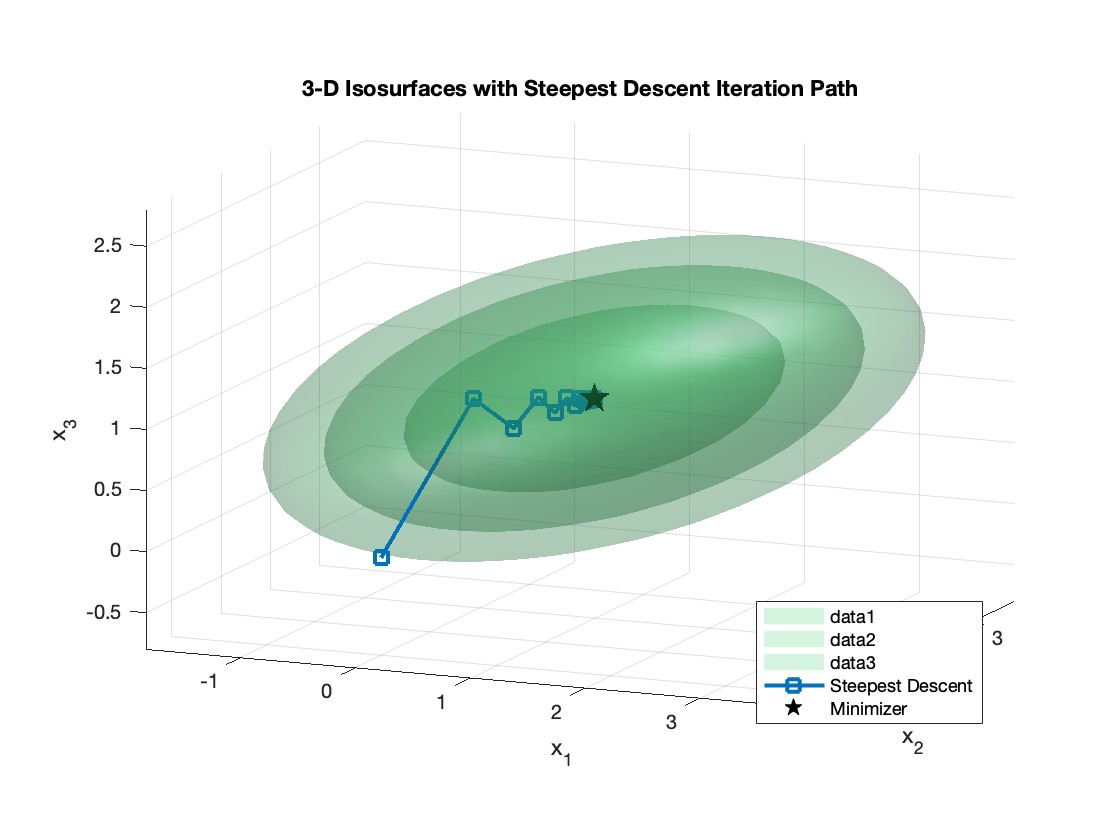

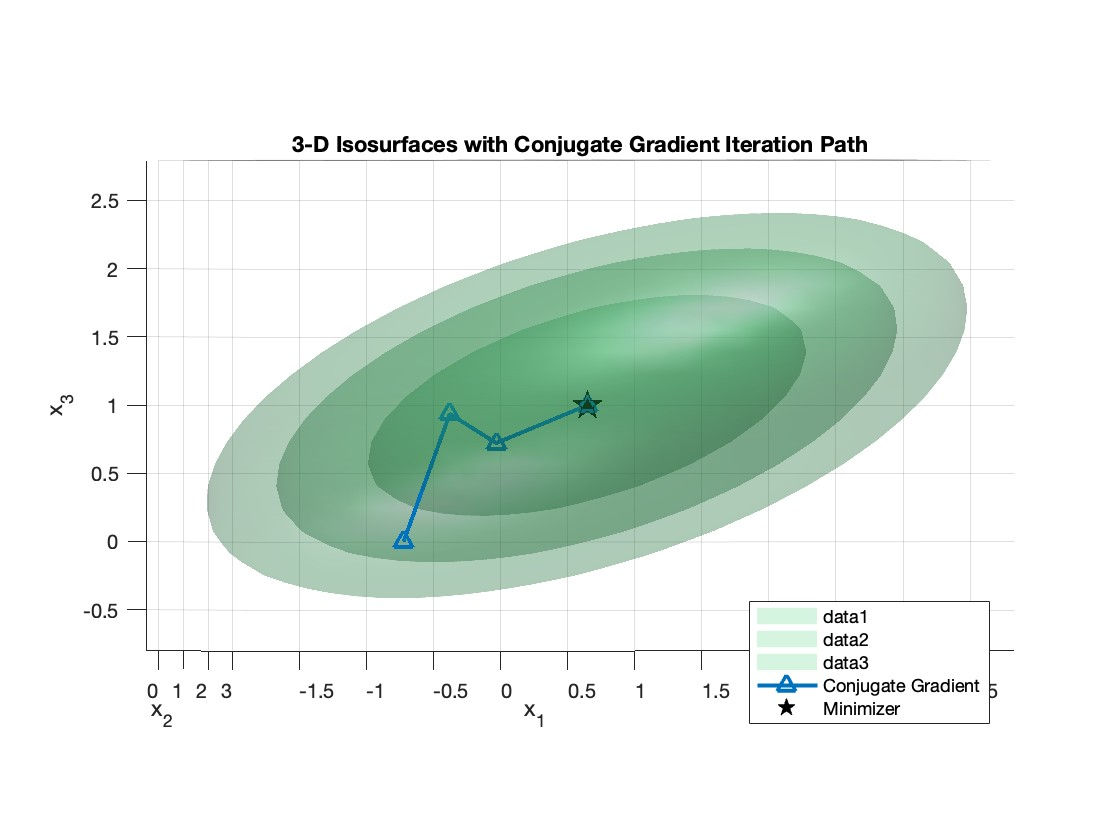

In [102]:
#Q2(c)
from IPython.display import Image, display

# Display a JPEG image by providing its path
image_path1 = '/Users/charleswong/Desktop/Gradient_d.jpg'
display(Image(filename=image_path1))

image_path2 = '/Users/charleswong/Desktop/Steepest_d.jpg'
display(Image(filename=image_path2))

image_path3 = '/Users/charleswong/Desktop/Conjugate_d.jpg'
display(Image(filename=image_path3))
